### <b>모듈 Import</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from cf_matrix import linear_confusion_matrix as lcm

### <b>데이터 로드</b>

In [2]:
df = pd.read_csv('PTAdataL.csv')

# df에서 ID, WRS_S, SRT_I 삭제
data = df.to_numpy()[:, 1:13]

data.shape

(29025, 12)

#### value가 0인 값을 포함하는 모든 행 삭제
L: 17206개

In [3]:
# value가 0인 값을 포함하는 행들 삭제
data_del = np.delete(data, np.unique(np.where(data[:] == 0)[0]), axis=0)
data_del.shape

(17206, 12)

In [4]:
dataX = data_del[:, :11].astype(float)
dataY = data_del[:, 11:].astype(float)

### <b>학습 및 예측</b>

In [5]:
model = LinearRegression()
model.fit(dataX, dataY)

predDataList = []
for i in range(data_del.shape[0]):
    predDataList.append(model.predict([list(dataX[i])]).tolist()[0])
    
predData = np.array(predDataList)

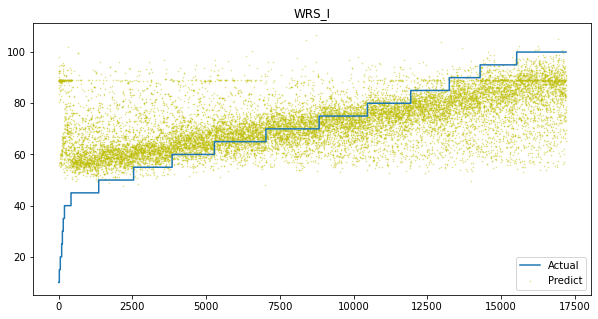

In [6]:
targets = ['WRS_I']
for i in range(len(targets)):
    pltData = np.array([dataY[:, i], predData[:, i]]).T
    pltData = pltData[pltData[:, 0].argsort()]
    plt.figure(figsize=(10,5))
    plt.title(targets[i])
    plt.step(range(pltData.shape[0]), pltData[:, 0], label='Actual')
    plt.scatter(range(pltData.shape[0]), pltData[:, 1], label='Predict', s=0.4, alpha=0.4, c='y')
    plt.legend()
    plt.show()

### <b>Confusion Matrix</b>

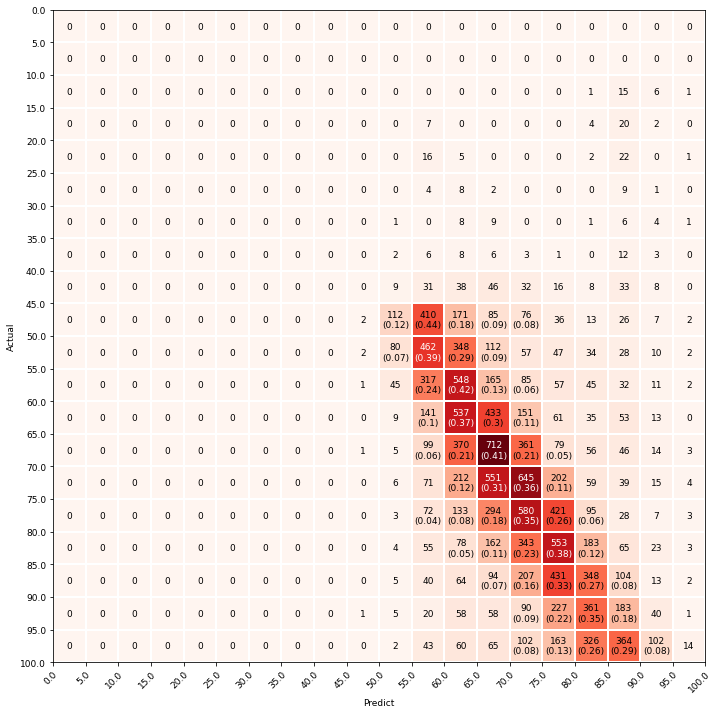

Accuracy: 0.18


In [25]:
from cf_matrix import linear_confusion_matrix as lcm

lcm(dataY, predData, number=20, annot=True, cmap='Reds', min_value=0, max_value=100)

In [8]:
k = np.array([[1, 3, 5],
             [0, 99, 2],
             [10, 7, -1]])

In [9]:
np.max(k)

99

In [10]:
len(dataY)

17206

In [11]:
len(pltData)

17206

In [12]:
max(1, 3)

3